#### Gaussian Process Regression
#### DATASET
## Student Performance

### Importing required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern
from sklearn.gaussian_process import kernels,GaussianProcessRegressor
import math
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


#### Predict student performance in secondary education (high school).

-----------------------------------------------------------------------
- Dataset Characteristics  - Multivariate
- Subject Area                    - Social Science
- Associated Tasks            - Classification, Regression
- Feature Type                    - Integer
- Instances                         - 649
- Features                           - 30
------------------------------------------------------------------------
#### Additional Information

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in two distinct subjects: Mathematics (mat) and Portuguese language (por). In [Cortez and Silva, 2008], the two datasets were modeled under binary/five-level classification and regression tasks. Important note: the target attribute G3 has a strong correlation with attributes G2 and G1. This occurs because G3 is the final year grade (issued at the 3rd period), while G1 and G2 correspond to the 1st and 2nd period grades. It is more difficult to predict G3 without G2 and G1, but such prediction is much more useful (see paper source for more details).

---------------------------------------------------------------------------------------------

https://archive.ics.uci.edu/dataset/320/student+performance

### Install the ucimlrepo package

In [2]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


### Import the dataset into your code

In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
student_performance = fetch_ucirepo(id=320) 
  
# data (as pandas dataframes) 
X = student_performance.data.features 
y = student_performance.data.targets 
  
# metadata 
print(student_performance.metadata) 
  
# variable information 
print(student_performance.variables) 


{'uci_id': 320, 'name': 'Student Performance', 'repository_url': 'https://archive.ics.uci.edu/dataset/320/student+performance', 'data_url': 'https://archive.ics.uci.edu/static/public/320/data.csv', 'abstract': 'Predict student performance in secondary education (high school). ', 'area': 'Social Science', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 649, 'num_features': 30, 'feature_types': ['Integer'], 'demographics': ['Sex', 'Age', 'Other', 'Education Level', 'Occupation'], 'target_col': ['G1', 'G2', 'G3'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2008, 'last_updated': 'Fri Jan 05 2024', 'dataset_doi': '10.24432/C5TG7T', 'creators': ['Paulo Cortez'], 'intro_paper': {'title': 'Using data mining to predict secondary school student performance', 'authors': 'P. Cortez, A. M. G. Silva', 'published_in': 'Proceedings of 5th Annual Future Business Technology Conference', 'year'

In [4]:
features_df = pd.DataFrame(student_performance.data.features)
targets_df = pd.DataFrame(student_performance.data.targets)
targets_df.head()

,G1,G2,G3
0,0,11,11
1,9,11,11
2,12,13,12
3,14,14,14
4,11,13,13


In [5]:
targets_df.describe()

,G1,G2,G3
count,649.000000,649.000000,649.000000
mean,11.399076,11.570108,11.906009
std,2.745265,2.913639,3.230656
min,0.000000,0.000000,0.000000
25%,10.000000,10.000000,10.000000
50%,11.000000,11.000000,12.000000
75%,13.000000,13.000000,14.000000
max,19.000000,19.000000,19.000000


In [6]:
features_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,3,4,1,1,3,4
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,5,3,3,1,1,3,2
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,4,3,2,2,3,3,6
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,3,2,2,1,1,5,0
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,4,3,2,1,2,5,0


In [7]:
# Define categorical and binary columns
categorical_columns = ['school', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian']
binary_columns = ['sex', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical columns
for col in categorical_columns:
    features_df[col + '_encoded'] = label_encoder.fit_transform(features_df[col])

# Encode binary columns (0 for 'no', 1 for 'yes')
for col in binary_columns:
    features_df[col + '_encoded'] = features_df[col].apply(lambda x: 1 if x == 'yes' else 0)

# Drop the original categorical and binary columns
features_df.drop(categorical_columns + binary_columns, axis=1, inplace=True)

# Display the modified DataFrame
features_df.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_encoded,sex_encoded,schoolsup_encoded,famsup_encoded,paid_encoded,activities_encoded,nursery_encoded,higher_encoded,internet_encoded,romantic_encoded
0,18,4,4,2,2,0,4,3,4,1,...,1,0,1,0,0,0,1,1,0,0
1,17,1,1,1,2,0,5,3,3,1,...,0,0,0,1,0,0,0,1,1,0
2,15,1,1,1,2,0,4,3,2,2,...,1,0,1,0,0,0,1,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,1,0,0,1,0,1,1,1,1,1
4,16,3,3,1,2,0,4,3,2,1,...,0,0,0,1,0,0,1,1,0,0


In [8]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data and transform it
scaled_features = scaler.fit_transform(features_df)
scaled_targets = scaler.fit_transform(targets_df)

# Convert the scaled arrays back to DataFrame
features_df_scaled = pd.DataFrame(scaled_features, columns=features_df.columns)
targets_df_scaled = pd.DataFrame(scaled_targets, columns=targets_df.columns)

# Display the scaled features DataFrame
features_df_scaled.head()


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_encoded,sex_encoded,schoolsup_encoded,famsup_encoded,paid_encoded,activities_encoded,nursery_encoded,higher_encoded,internet_encoded,romantic_encoded
0,1.031695,1.310216,1.540715,0.576718,0.083653,-0.374305,0.072606,-0.171647,0.693785,-0.543555,...,0.332648,0.0,2.923032,-1.259229,-0.252853,-0.971140,0.495663,0.344914,-1.816043,-0.763496
1,0.210137,-1.336039,-1.188832,-0.760032,0.083653,-0.374305,1.119748,-0.171647,-0.157380,-0.543555,...,-1.594926,0.0,-0.342110,0.794137,-0.252853,-0.971140,-2.017502,0.344914,0.550648,-0.763496
2,-1.432980,-1.336039,-1.188832,-0.760032,0.083653,-0.374305,0.072606,-0.171647,-1.008546,0.538553,...,0.332648,0.0,2.923032,-1.259229,-0.252853,-0.971140,0.495663,0.344914,0.550648,-0.763496
3,-1.432980,1.310216,-0.278983,-0.760032,1.290114,-0.374305,-0.974536,-1.123771,-1.008546,-0.543555,...,0.332648,0.0,-0.342110,0.794137,-0.252853,1.029717,0.495663,0.344914,0.550648,1.309764
4,-0.611422,0.428131,0.630866,-0.760032,0.083653,-0.374305,0.072606,-0.171647,-1.008546,-0.543555,...,-1.594926,0.0,-0.342110,0.794137,-0.252853,-0.971140,0.495663,0.344914,-1.816043,-0.763496


In [9]:
# # # Initialize the StandardScaler
# scaler = StandardScaler()

# # # Fit the scaler to the data and transform it
# features_df = pd.DataFrame(scaler.fit_transform(features_df))
# targets_df = pd.DataFrame(scaler.fit_transform(targets_df))
# features_df.head()

In [20]:
X = features_df.apply(pd.to_numeric, errors='coerce').dropna(axis=1)
y = targets_df.apply(pd.to_numeric, errors='coerce').fillna(0)
y = targets_df.iloc[:, 0]
X.head(10)

# len(X)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_encoded,sex_encoded,schoolsup_encoded,famsup_encoded,paid_encoded,activities_encoded,nursery_encoded,higher_encoded,internet_encoded,romantic_encoded
0,18,4,4,2,2,0,4,3,4,1,...,1,0,1,0,0,0,1,1,0,0
1,17,1,1,1,2,0,5,3,3,1,...,0,0,0,1,0,0,0,1,1,0
2,15,1,1,1,2,0,4,3,2,2,...,1,0,1,0,0,0,1,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,1,0,0,1,0,1,1,1,1,1
4,16,3,3,1,2,0,4,3,2,1,...,0,0,0,1,0,0,1,1,0,0
5,16,4,3,1,2,0,5,4,2,1,...,1,0,0,1,0,1,1,1,1,0
6,16,2,2,1,2,0,4,4,4,1,...,1,0,0,0,0,0,1,1,1,0
7,17,4,4,2,2,0,4,1,4,1,...,1,0,1,1,0,0,1,1,0,0
8,15,3,2,1,2,0,4,2,2,1,...,1,0,0,1,0,0,1,1,1,0
9,15,3,4,1,2,0,5,5,1,1,...,1,0,0,1,0,1,1,1,1,0


C:\Users\pujan\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


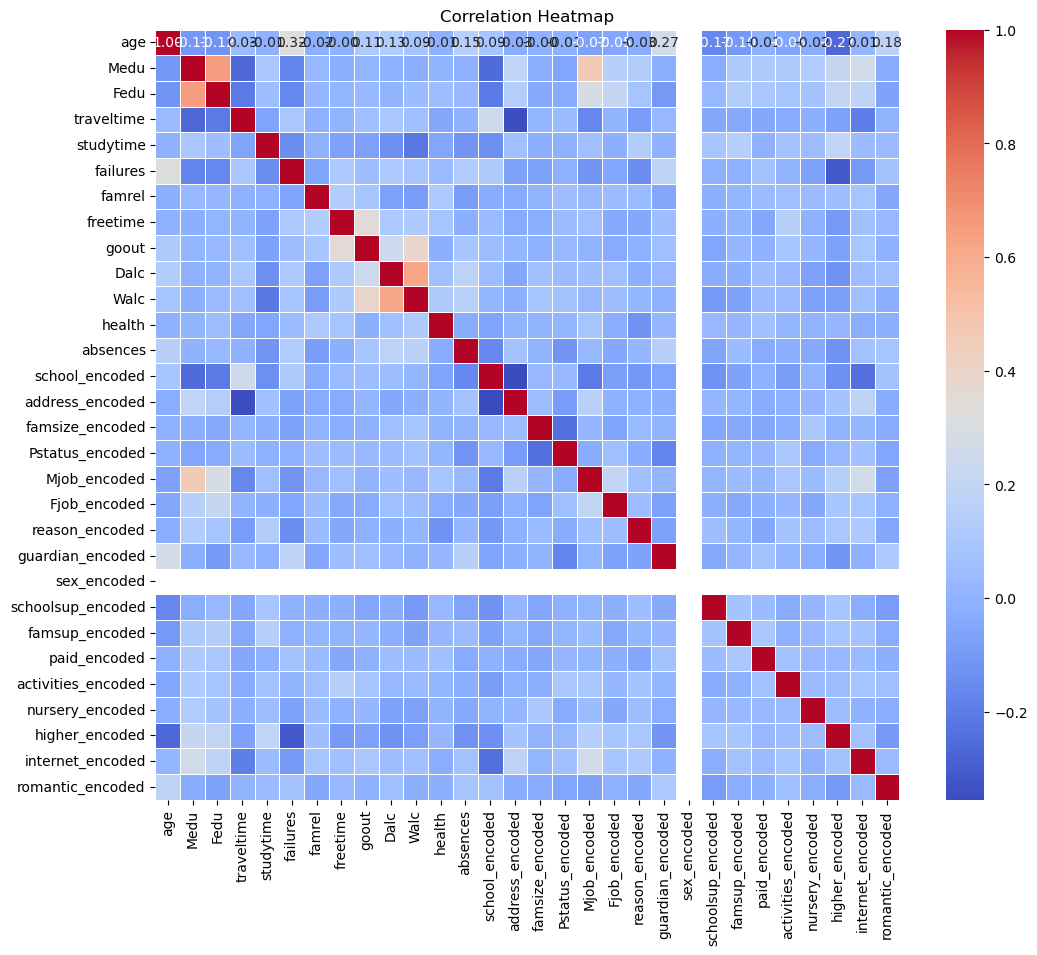

In [21]:
corr_matrix = X.corr()


# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [22]:
# # Remove features with correlation higher than 0.65
# high_correlation_features = corr_matrix[abs(corr_matrix) > 0.8]
# high_correlation_features = high_correlation_features.stack().reset_index()
# high_correlation_features = high_correlation_features[high_correlation_features['level_0'] != high_correlation_features['level_1']]
# high_correlation_features

### Split dataset into Train and Test

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=False)

In [24]:
np.random.seed(0)
n=50
 
kernel_ =[kernels.RBF (),
 
         kernels.RationalQuadratic(),
 
         kernels.ExpSineSquared(periodicity=10.0),
 
         kernels.Matern()
         ]
print(kernel_, '\n')

kernel_

[RBF(length_scale=1), RationalQuadratic(alpha=1, length_scale=1), ExpSineSquared(length_scale=1, periodicity=10), Matern(length_scale=1, nu=1.5)] 



[RBF(length_scale=1),
 RationalQuadratic(alpha=1, length_scale=1),
 ExpSineSquared(length_scale=1, periodicity=10),
 Matern(length_scale=1, nu=1.5)]

In [25]:
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

# Define the Gaussian Process regression model with an RBF kernel
kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
gp_model = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, random_state=42)

# Train the Gaussian Process regression model
gp_model.fit(X_train, y_train)


# Make predictions on the test set
y_pred, std = gp_model.predict(X_test, return_std = True)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Standard Deviation : {std}")
print(f"Y Train :\n{y_train}")

Mean Squared Error (MSE): 9.958340967636962
Standard Deviation : [2.19293918 2.65877233 1.93866311 1.90594484 4.66948914 2.97428383
 1.85323239 2.17559715 3.00063629 2.99752644 2.62228358 3.83044414
 3.17403039 2.4905615  1.85841916 3.56307988 3.60395619 3.70147338
 3.37389805 1.78830864 3.54917664 2.46638324 2.53111918 2.64760645
 3.94196246 3.34629571 2.92283076 2.48982679 3.34709919 2.96156673
 2.13014097 2.48346618 2.54983465 2.85587479 3.15671687 3.16899251
 2.46142995 2.55692803 3.01294197 2.72367804 3.54019278 2.436618
 3.11490879 2.07284834 3.35732968 2.11206936 2.39915493 2.68648792
 3.16775229 4.07476364 4.03456467 2.4661772  3.78420315 4.64061054
 3.16703994 4.15040234 3.53618066 4.17246738 3.81896272 2.01140432
 2.52526735 3.16235887 2.67125714 3.92551495 2.36182345 2.42409048
 3.35286635 2.5638524  2.39363982 3.26098975 2.89433239 2.93582045
 3.43703979 1.61466811 2.48391026 3.05826805 2.81778964 1.43927086
 2.07557677 4.77657299 4.28704822 3.26455043 3.02714866 2.69510134

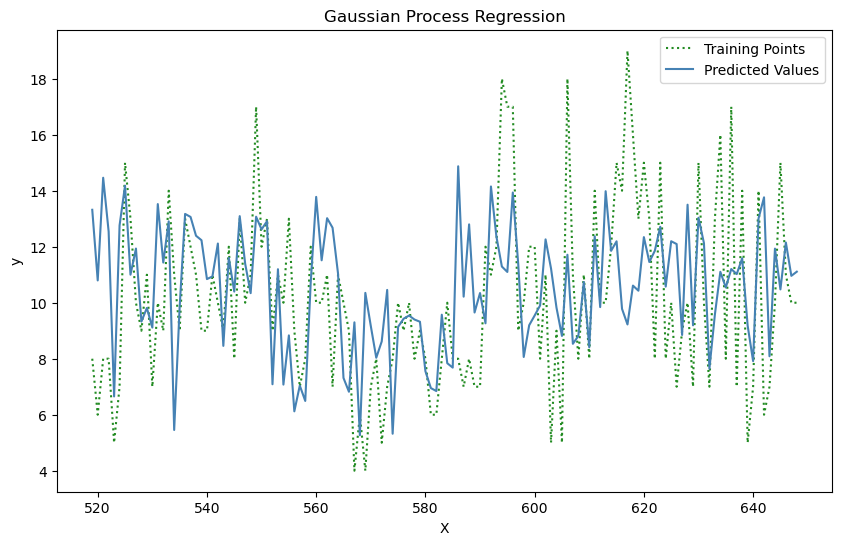

In [26]:
# Plot the original data points
plt.figure(figsize=(10, 6))
plt.plot(X_test.index, y_test, color='forestgreen', label='Training Points', linestyle="dotted")

# Plot the predicted values and uncertainty
plt.plot(X_test.index, y_pred, color='steelblue', label='Predicted Values')
# plt.fill_between(X_test.index, y_pred - 1.96 * std, y_pred + 1.96 * std,
#                  color='orange', alpha=0.3, label='95% Confidence Interval')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Gaussian Process Regression')
plt.legend()
plt.show()

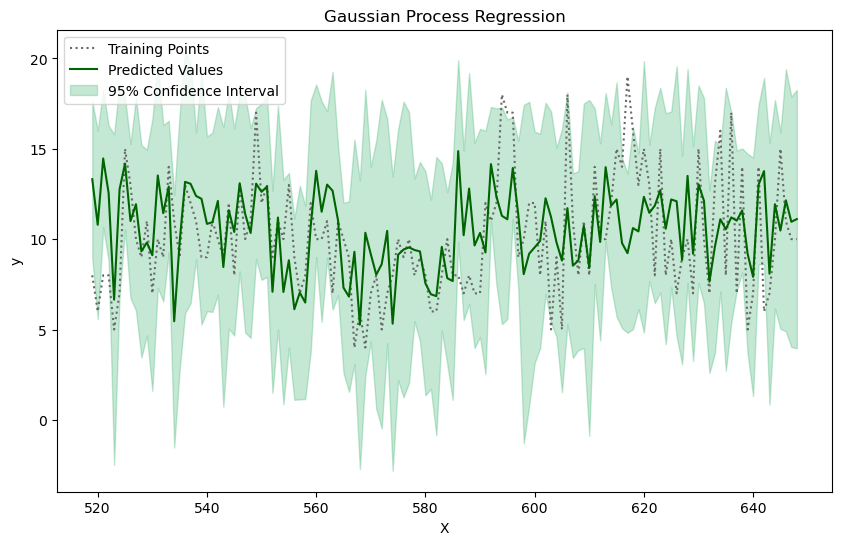

In [27]:
# Plot the original data points
plt.figure(figsize=(10, 6))
plt.plot(X_test.index, y_test, color='dimgray', label='Training Points', linestyle="dotted")

# Plot the predicted values and uncertainty
plt.plot(X_test.index, y_pred, color='darkgreen', label='Predicted Values')
plt.fill_between(X_test.index, y_pred - 1.96 * std, y_pred + 1.96 * std,
                 color='mediumseagreen', alpha=0.3, label='95% Confidence Interval')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Gaussian Process Regression')
plt.legend()
plt.show()

In [28]:
# # Generate synthetic data for demonstration
# np.random.seed(0)
# X = np.linspace(0.1, 9.9, 100).reshape(-1, 1)
# y = np.sin(X).ravel() + np.random.normal(0, 0.1, size=X.shape[0])

# # Define the Gaussian Process regression model with an RBF kernel
# kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
# gp_model = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, random_state=42)

# # Fit the Gaussian Process regression model to the synthetic data
# gp_model.fit(X, y)

# # Generate test data for predictions
# X_test = np.linspace(0, 10, 1000).reshape(-1, 1)

# # Make predictions and get uncertainty estimates
# y_pred, std_dev = gp_model.predict(X_test, return_std=True)

# # Plot the original data points
# plt.figure(figsize=(10, 6))
# plt.scatter(X, y, color='blue', label='Training Points')

# # Plot the predicted values and uncertainty
# plt.plot(X_test, y_pred, color='red', label='Predicted Values')
# plt.fill_between(X_test.ravel(), y_pred - 1.96 * std_dev, y_pred + 1.96 * std_dev,
#                  color='orange', alpha=0.3, label='95% Confidence Interval')

# plt.xlabel('X')
# plt.ylabel('y')
# plt.title('Gaussian Process Regression')
# plt.legend()
# plt.show()

### Bayesian Network

[RBF(length_scale=1), RationalQuadratic(alpha=1, length_scale=1), ExpSineSquared(length_scale=1, periodicity=10), Matern(length_scale=1, nu=1.5)] 

Mean Squared error with 1**2 * RBF(length_scale=1) Kernel (9.958340967636962)
Mean Absolute error with 1**2 * RBF(length_scale=1) Kernel (2.484927326268132)


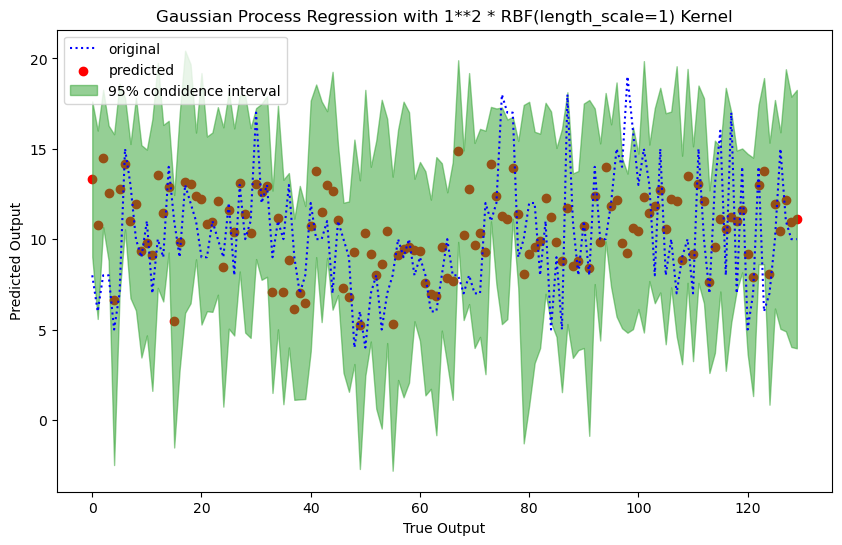

Mean Squared error with Bayesian Regression (8.38646040637883)
Mean Absolute error with Bayesian Regression (2.303767374037533)


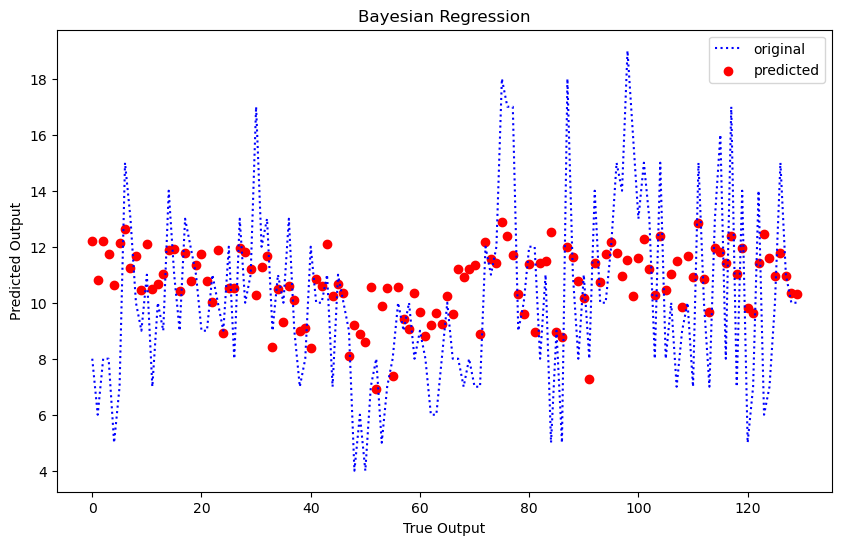

In [29]:
# Define kernel
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

kernel  = C(1.0, (1e-3, 1e3)) * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))

kernel

np.random.seed(0)
n=50

kernel_ =[kernels.RBF (),

         kernels.RationalQuadratic(),

         kernels.ExpSineSquared(periodicity=10.0),

         kernels.Matern()
         ]
print(kernel_, '\n')

kernel_


n_restarts_optimizer = 9
# for kernel in kernel_:
# Train Gaussian Process
gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=n_restarts_optimizer)
gaussian_process.fit(X_train, y_train)

X_test_copy = X_test.copy()
X_test_copy.reset_index(drop=True, inplace=True)

y_test_copy = y_test.copy()
y_test_copy.reset_index(drop=True, inplace=True)

# Evaluate model
y_pred, std = gaussian_process.predict(X_test_copy, return_std=True)

mse = mean_squared_error(y_test_copy, y_pred)
print(f"Mean Squared error with {kernel} Kernel ({mse})")
mae = mean_absolute_error(y_test_copy, y_pred)
print(f"Mean Absolute error with {kernel} Kernel ({mae})")

# Visualize predictions and uncertainty
plt.figure(figsize=(10, 6))
plt.plot(y_test_copy.index, y_test_copy, c='b', label="original", linestyle = "dotted")
plt.scatter(y_test_copy.index, y_pred, c='r', label="predicted")
plt.fill_between(
        y_test_copy.index,
        y_pred - 1.96 * std,
        y_pred + 1.96 * std,
        alpha=0.5,
        label="95% condidence interval",
        color="tab:green",
    )
plt.xlabel("True Output")
plt.ylabel("Predicted Output")
plt.title(f"Gaussian Process Regression with {kernel} Kernel")
plt.legend()
plt.show()




from sklearn.linear_model import BayesianRidge

# Train Bayesian Ridge Regression
bayesian_regression = BayesianRidge()

# Fit the model
bayesian_regression.fit(X_train, y_train)

# Evaluate model
y_pred = bayesian_regression.predict(X_test_copy)

mse = mean_squared_error(y_test_copy, y_pred)
print(f"Mean Squared error with Bayesian Regression ({mse})")
mae = mean_absolute_error(y_test_copy, y_pred)
print(f"Mean Absolute error with Bayesian Regression ({mae})")

# Visualize predictions
plt.figure(figsize=(10, 6))
plt.plot(y_test_copy.index, y_test_copy, c='b', label="original", linestyle = "dotted")
plt.scatter(y_test_copy.index, y_pred, c='r', label="predicted")
plt.xlabel("True Output")
plt.ylabel("Predicted Output")
plt.title("Bayesian Regression")
plt.legend()
plt.show()